copyright 2024: *XIN CHANG, Politechnika Warszawska*<br>
(notatnik adresowany do studentów: ENNCA)
$\newcommand{\xx}[2]{(#1)(#2)}$
$\newcommand{\bb}[1]{\mathbb{#1}}$
$\newcommand{\cl}[1]{\mathcal{#1}}$
$\newcommand{\tp}[1]{{#1}^{\intercal}}$
$\newcommand{\tr}[1]{\text{trace}\left[#1\right]}$
$\newcommand{\inv}[1]{\in\bb{R}^{#1}}$
$\newcommand{\inm}[2]{\in\bb{R}^{#1\times#2}}$
$\newcommand{\invc}[1]{\in\bb{C}^{#1}}$
$\newcommand{\inmc}[2]{\in\bb{C}^{#1\times#2}}$
$\newcommand{\rbox}[2]{\mathrel{\raise{#1}{#2}}}$
$\newcommand{\xconv}[5]{
\begin{array}[]{r}{\tiny{#4\ }}\\\raise{2.5pt}{{\tiny{#3}}}\end{array}
\kern{-4pt}
\begin{array}[]{l}{\LARGE\bb{C}}\kern{-6.5pt}\raise{4.5pt}{{\tiny{#5}}}\end{array}
\kern{0pt}
\begin{array}[]{l}{\tiny {#2}}\\\raise{2.5pt}{{\tiny{#1}}}\end{array}}$
$\newcommand{\xdense}[5]{
\begin{array}[]{r}{\tiny{#4\ }}\\\raise{1.5pt}{{\tiny{#3}}}\end{array}
\kern{-4pt}
\begin{array}[]{l}{\LARGE\bb{F}}\kern{-4.5pt}\raise{1.5pt}{{\tiny{#5}}}\end{array}
\kern{2pt}
\begin{array}[]{l}{\tiny {#2}}\\\raise{1.5pt}{{\tiny{#1}}}\end{array}}$
$\newcommand{\xpool}[5]{
\begin{array}[]{r}{\tiny{#4\ }}\\\raise{1.5pt}{{\tiny{#3}}}\end{array}
\kern{-3pt}
\begin{array}[]{l}{\LARGE\bb{P}}\kern{-6.5pt}\raise{0.8pt}{{\tiny{#5}}}\end{array}
\kern{0pt}
\begin{array}[]{l}{\tiny {#2}}\\\raise{1.5pt}{{\tiny{#1}}}\end{array}}$
$\newcommand{\xinp}[5]{
\begin{array}[]{r}{\tiny{#4\ }}\\\raise{1.5pt}{{\tiny{#3}}}\end{array}
\kern{-4pt}
\begin{array}[]{l}{\LARGE\cl{I}}\kern{-4.5pt}\raise{1.5pt}{{\tiny{#5}}}\end{array}
\kern{2pt}
\begin{array}[]{l}{\tiny {#2}}\\\raise{1.5pt}{{\tiny{#1}}}\end{array}}$
$\newcommand{\xdrop}[5]{
\begin{array}[]{r}{\tiny{#4\ }}\\\raise{1.5pt}{{\tiny{#3}}}\end{array}
\kern{-4pt}
\begin{array}[]{l}{\LARGE\bb{D}}\kern{-4.5pt}\raise{1.5pt}{{\tiny{#5}}}\end{array}
\kern{0.5pt}
\begin{array}[]{l}{\tiny {#2}}\\\raise{1.5pt}{{\tiny{#1}}}\end{array}}$
$\newcommand{\xmerge}[5]{
\begin{array}[]{r}{\tiny{#4\ }}\\\raise{1.5pt}{{\tiny{#3}}}\end{array}
\kern{-4pt}
\begin{array}[]{l}{\LARGE\bb{M}}\kern{-4.5pt}\raise{1.5pt}{{\tiny{#5}}}\end{array}
\kern{2pt}
\begin{array}[]{l}{\tiny {#2}}\\\raise{1.5pt}{{\tiny{#1}}}\end{array}}$
$\newcommand{\xgeneral}[5]{
\begin{array}[]{r}{\tiny{#4\ }}\\\raise{1.5pt}{{\tiny{#3}}}\end{array}
\kern{-4pt}
\begin{array}[]{l}{\LARGE\bb{Q}}\kern{-9.0pt}\raise{4.5pt}{{\tiny{#5}}}\end{array}
\kern{2pt}
\begin{array}[]{l}{\tiny {#2}}\\\raise{1.5pt}{{\tiny{#1}}}\end{array}}$
$\def\ds{\displaystyle}$
$\def\ass{\leftarrow}$
$\def\od#1#2{\nabla_{#2}#1}$
$\def\tod#1#2{\tp{\nabla}_{#2}{#1}}$
$\def\cl#1{{\cal#1}}$
$\def\sp#1#2{\frac{\partial#1}{\partial#2}}$
$\def\eqd{\doteq}$
$\def\ra{\rightarrow}$
$\def\lra{\longrightarrow}$
$\def\ovra#1{\overset{#1}{\lra}}$
$\def\dra{\overset{\circ}{\lra}}$
$\def\xeq#1{\overset{#1}{=}}$
$\def\ov#1{\overline{#1}}$
$\def\dotp#1#2{\left\langle#1,#2\right\rangle}$
$\def\th#1{\ov{#1}^{\intercal}}$
$\def\rv#1{\widetilde{#1}}$
$\def\vars#1#2{\mathtt{var}_{#1}{\left[#2\right]}}$
$\def\pmodd#1{\kern{-1mm}\pmod{#1}}$
$\def\pdt#1#2#3{\frac{\partial^2 #1}{\partial #2\partial #3}}$
$\def\diag#1{\mathtt{diag}\left[#1\right]}$
$\def\rank#1{\mathtt{rank}\left[#1\right]}$
$\def\tr#1{\mathtt{tr}\left[#1\right]}$


#Pipeline: Prepare float32 models

##Prepare the datasets

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
from torchvision import transforms

# Training transformations
train_transform = transforms.Compose([
    transforms.Resize(56),
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomRotation(10),      # Randomly rotate images by up to 10 degrees
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize with mean and std for each channel
])

# Validation transformations
val_transform = transforms.Compose([
    transforms.Resize(56),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize with mean and std for each channel
])
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [3]:
# Load and transform the CIFAR-10 training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,  # Adjusted batch size for GPU memory considerations
                                          shuffle=True, num_workers=2)

# Load and transform the CIFAR-10 validation dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=val_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,  # Adjusted batch size for GPU memory considerations
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


## Prepare the training function

In [4]:
import torch
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter  # For logging purposes
from torch.optim.lr_scheduler import CosineAnnealingLR  # Learning rate scheduler

def train(model, trainloader, testloader, criterion, optimizer, total_epochs, scheduler, saving_dir):
    writer = SummaryWriter(saving_dir)  # Initializes a writer for logging to TensorBoard

    # Checks if a CUDA GPU is available and moves the model to GPU if possible
    if torch.cuda.is_available():
        model = model.cuda()

    # Starts the training loop
    for epoch in range(total_epochs):
        model.train()  # Sets the model to training mode
        running_loss = 0.0  # Variable to accumulate losses for logging

        # Iterates over the training data loader
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data  # Unpacks the data
            if torch.cuda.is_available():  # Moves data to GPU if available
                inputs = inputs.cuda()
                labels = labels.cuda()
            optimizer.zero_grad()  # Clears the gradients of all optimized tensors

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            loss.backward()  # Performs backward propagation
            optimizer.step()  # Performs a single optimization step

            running_loss += loss.item()
            if i % 50 == 0:  # Logs the training loss every 50 mini-batches
                print(f'[Epoch: {epoch + 1}, Batch: {i + 1:5d}], Training Loss: {running_loss / 2000:.3f}')
                running_loss = 0.0

        # Validation phase after each epoch
        model.eval()  # Sets the model to evaluation mode
        scheduler.step()  # Adjusts the learning rate based on the scheduler
        val_loss, correct, total = 0.0, 0, 0  # Initializes variables for validation metrics

        with torch.no_grad():  # Disables gradient calculation
            for data in testloader:
                images, labels = data
                if torch.cuda.is_available():
                    images = images.cuda()
                    labels = labels.cuda()
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss /= len(testloader)  # Calculates average validation loss
        accuracy = 100 * correct / total  # Calculates validation accuracy

        # Logs validation metrics to TensorBoard
        print(f'Epoch: {epoch + 1} Validation Loss: {val_loss:.3f} Accuracy: {accuracy:.2f}%')
        writer.add_scalar('training loss', running_loss / len(trainloader), epoch)
        writer.add_scalar('validation loss', val_loss, epoch)
        writer.add_scalar('accuracy', accuracy, epoch)

    writer.close()  # Closes the writer and ends logging
    print('Finished Training')  # Indicates the end of training


## Select and modify the model

In [5]:
from torchvision import models
model = models.mobilenet_v2(pretrained=True)

# Modify the classifier
model.classifier[1] = nn.Linear(model.last_channel, 10)  # MobileNetV2's last_channel is the input feature size to the classifier

/home/agorski/Desktop/projects/ENNCA-agorski/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/agorski/Desktop/projects/ENNCA-agorski/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Run float model training

In [6]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
# Assuming total_epochs is defined as the total number of epochs you plan to train
# Training
total_epochs = 10
scheduler = CosineAnnealingLR(optimizer, T_max=total_epochs, eta_min=0)  # Set eta_min according to your requirements

train(model, trainloader, testloader, criterion, optimizer, total_epochs, scheduler,'output')

[Epoch: 1, Batch:     1], Training Loss: 0.001
[Epoch: 1, Batch:    51], Training Loss: 0.048
[Epoch: 1, Batch:   101], Training Loss: 0.034
[Epoch: 1, Batch:   151], Training Loss: 0.029
[Epoch: 1, Batch:   201], Training Loss: 0.026
[Epoch: 1, Batch:   251], Training Loss: 0.024
[Epoch: 1, Batch:   301], Training Loss: 0.023
[Epoch: 1, Batch:   351], Training Loss: 0.021
[Epoch: 1, Batch:   401], Training Loss: 0.022
[Epoch: 1, Batch:   451], Training Loss: 0.020
[Epoch: 1, Batch:   501], Training Loss: 0.019
[Epoch: 1, Batch:   551], Training Loss: 0.019
[Epoch: 1, Batch:   601], Training Loss: 0.019
[Epoch: 1, Batch:   651], Training Loss: 0.017
[Epoch: 1, Batch:   701], Training Loss: 0.018
[Epoch: 1, Batch:   751], Training Loss: 0.018
[Epoch: 1, Batch:   801], Training Loss: 0.017
[Epoch: 1, Batch:   851], Training Loss: 0.017
[Epoch: 1, Batch:   901], Training Loss: 0.017
[Epoch: 1, Batch:   951], Training Loss: 0.016
[Epoch: 1, Batch:  1001], Training Loss: 0.017
[Epoch: 1, Ba

Don't forget to save the model after the training. You can use your own checkpoint for further quantization procedure.

# Quantization: Prepare fake-quantized model

##Fuse BatchNorm

In [7]:
from torch.ao.quantization import quantize_fx
model = quantize_fx.fuse_fx(model.eval())

Check what's changed to the model, you should see the batch normalization disappeared.

In [8]:
model

GraphModule(
  (features): Module(
    (0): Module(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (2): ReLU6(inplace=True)
    )
    (1): Module(
      (conv): Module(
        (0): Module(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (2): Module(
      (conv): Module(
        (0): Module(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1))
          (2): ReLU6(inplace=True)
        )
        (1): Module(
          (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=96)
          (2): ReLU6(inplace=True)
        )
        (2): Conv2d(96, 24, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (3): Module(
      (conv): Module(
        (0): Module(
          (0): Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1))
          (2): ReLU6(inplace=T

##Prepare fake quantizers

In [9]:
!pip install git+https://github.com/alibaba/TinyNeuralNetwork.git

  Cloning https://github.com/alibaba/TinyNeuralNetwork.git to /tmp/pip-req-build-jddnmecn
  Running command git clone --filter=blob:none --quiet https://github.com/alibaba/TinyNeuralNetwork.git /tmp/pip-req-build-jddnmecn
  Resolved https://github.com/alibaba/TinyNeuralNetwork.git to commit fb56fd944aa80bd48f1ef48970eb07286a64fdad
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [10]:
from tinynn.graph.quantization.quantizer import QATQuantizer

In [11]:
quantizer = QATQuantizer(
        model,
        torch.randn(1,3,52,52),
        work_dir='quant_output',
        config={
            'asymmetric': True,
            'backend': 'qnnpack',
            "disable_requantization_for_cat": True,
            'per_tensor': True,
        })

In [12]:
model_with_quantizer = quantizer.quantize()

In [13]:
model_with_quantizer

QGraphModule(
  (fake_quant_0): QuantStub(
    (activation_post_process): FakeQuantize(
      fake_quant_enabled=tensor([1], device='cuda:0', dtype=torch.uint8), observer_enabled=tensor([1], device='cuda:0', dtype=torch.uint8), quant_min=0, quant_max=255, dtype=torch.quint8, qscheme=torch.per_tensor_affine, ch_axis=-1, scale=tensor([1.], device='cuda:0'), zero_point=tensor([0], device='cuda:0', dtype=torch.int32)
      (activation_post_process): MovingAverageMinMaxObserver(min_val=inf, max_val=-inf)
    )
  )
  (features_0_0): Conv2d(
    3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)
    (weight_fake_quant): FakeQuantize(
      fake_quant_enabled=tensor([1], device='cuda:0', dtype=torch.uint8), observer_enabled=tensor([1], device='cuda:0', dtype=torch.uint8), quant_min=-128, quant_max=127, dtype=torch.qint8, qscheme=torch.per_tensor_symmetric, ch_axis=-1, scale=tensor([1.], device='cuda:0'), zero_point=tensor([0], device='cuda:0', dtype=torch.int32)
      (activation_post_pr

In [14]:
model_with_quantizer.eval()

QGraphModule(
  (fake_quant_0): QuantStub(
    (activation_post_process): FakeQuantize(
      fake_quant_enabled=tensor([1], device='cuda:0', dtype=torch.uint8), observer_enabled=tensor([1], device='cuda:0', dtype=torch.uint8), quant_min=0, quant_max=255, dtype=torch.quint8, qscheme=torch.per_tensor_affine, ch_axis=-1, scale=tensor([1.], device='cuda:0'), zero_point=tensor([0], device='cuda:0', dtype=torch.int32)
      (activation_post_process): MovingAverageMinMaxObserver(min_val=inf, max_val=-inf)
    )
  )
  (features_0_0): Conv2d(
    3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)
    (weight_fake_quant): FakeQuantize(
      fake_quant_enabled=tensor([1], device='cuda:0', dtype=torch.uint8), observer_enabled=tensor([1], device='cuda:0', dtype=torch.uint8), quant_min=-128, quant_max=127, dtype=torch.qint8, qscheme=torch.per_tensor_symmetric, ch_axis=-1, scale=tensor([1.], device='cuda:0'), zero_point=tensor([0], device='cuda:0', dtype=torch.int32)
      (activation_post_pr

##Post training quantization (PTQ) calibration

In [15]:
def calibration(model, num_iteration, dataloader):
  iteration_num = num_iteration
  count = 0
  for data in dataloader:
      images, labels = data
      if torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
      model(images)
      count += 1
      if count >= iteration_num:
        break
  return model

In [16]:
model_with_quantizer = calibration(model_with_quantizer, 50, testloader)

In [17]:
def eval_model(model, dataloader, criterion):
  val_loss = 0.0
  correct = 0
  total = 0
  with torch.no_grad():
      for data in dataloader:
          images, labels = data
          if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
          outputs = model(images)
          loss = criterion(outputs, labels)
          val_loss += loss.item()
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  val_loss /= len(dataloader)
  accuracy = 100 * correct / total

  print(f' Validation Loss: {val_loss:.3f} Accuracy: {accuracy:.2f}%')

In [18]:
model_with_quantizer.apply(torch.quantization.disable_observer)

QGraphModule(
  (fake_quant_0): QuantStub(
    (activation_post_process): FakeQuantize(
      fake_quant_enabled=tensor([1], device='cuda:0', dtype=torch.uint8), observer_enabled=tensor([0], device='cuda:0', dtype=torch.uint8), quant_min=0, quant_max=255, dtype=torch.quint8, qscheme=torch.per_tensor_affine, ch_axis=-1, scale=tensor([0.0078], device='cuda:0'), zero_point=tensor([127], device='cuda:0', dtype=torch.int32)
      (activation_post_process): MovingAverageMinMaxObserver(min_val=-1.0, max_val=1.0)
    )
  )
  (features_0_0): Conv2d(
    3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)
    (weight_fake_quant): FakeQuantize(
      fake_quant_enabled=tensor([1], device='cuda:0', dtype=torch.uint8), observer_enabled=tensor([0], device='cuda:0', dtype=torch.uint8), quant_min=-128, quant_max=127, dtype=torch.qint8, qscheme=torch.per_tensor_symmetric, ch_axis=-1, scale=tensor([0.0048], device='cuda:0'), zero_point=tensor([0], device='cuda:0', dtype=torch.int32)
      (activati

In [19]:
eval_model(model_with_quantizer, testloader, criterion)

 Validation Loss: 0.357 Accuracy: 88.32%


##Prepare Quantization Awareness Training (QAT)

In [20]:
model_with_quantizer.apply(torch.quantization.disable_observer)

QGraphModule(
  (fake_quant_0): QuantStub(
    (activation_post_process): FakeQuantize(
      fake_quant_enabled=tensor([1], device='cuda:0', dtype=torch.uint8), observer_enabled=tensor([0], device='cuda:0', dtype=torch.uint8), quant_min=0, quant_max=255, dtype=torch.quint8, qscheme=torch.per_tensor_affine, ch_axis=-1, scale=tensor([0.0078], device='cuda:0'), zero_point=tensor([127], device='cuda:0', dtype=torch.int32)
      (activation_post_process): MovingAverageMinMaxObserver(min_val=-1.0, max_val=1.0)
    )
  )
  (features_0_0): Conv2d(
    3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)
    (weight_fake_quant): FakeQuantize(
      fake_quant_enabled=tensor([1], device='cuda:0', dtype=torch.uint8), observer_enabled=tensor([0], device='cuda:0', dtype=torch.uint8), quant_min=-128, quant_max=127, dtype=torch.qint8, qscheme=torch.per_tensor_symmetric, ch_axis=-1, scale=tensor([0.0048], device='cuda:0'), zero_point=tensor([0], device='cuda:0', dtype=torch.int32)
      (activati

In [21]:
train(model_with_quantizer, trainloader, testloader, criterion, optimizer, total_epochs, scheduler,'output')

[Epoch: 1, Batch:     1], Training Loss: 0.000
[Epoch: 1, Batch:    51], Training Loss: 0.004
[Epoch: 1, Batch:   101], Training Loss: 0.004
[Epoch: 1, Batch:   151], Training Loss: 0.004
[Epoch: 1, Batch:   201], Training Loss: 0.004
[Epoch: 1, Batch:   251], Training Loss: 0.004
[Epoch: 1, Batch:   301], Training Loss: 0.004
[Epoch: 1, Batch:   351], Training Loss: 0.004
[Epoch: 1, Batch:   401], Training Loss: 0.004
[Epoch: 1, Batch:   451], Training Loss: 0.005
[Epoch: 1, Batch:   501], Training Loss: 0.004
[Epoch: 1, Batch:   551], Training Loss: 0.004
[Epoch: 1, Batch:   601], Training Loss: 0.004
[Epoch: 1, Batch:   651], Training Loss: 0.004
[Epoch: 1, Batch:   701], Training Loss: 0.003
[Epoch: 1, Batch:   751], Training Loss: 0.004
[Epoch: 1, Batch:   801], Training Loss: 0.004
[Epoch: 1, Batch:   851], Training Loss: 0.004
[Epoch: 1, Batch:   901], Training Loss: 0.004
[Epoch: 1, Batch:   951], Training Loss: 0.004
[Epoch: 1, Batch:  1001], Training Loss: 0.004
[Epoch: 1, Ba

In [22]:
eval_model(model_with_quantizer, testloader, criterion)

 Validation Loss: 0.357 Accuracy: 88.32%


##Output analysis:

In [23]:
model_with_quantizer._modules['fake_quant_0']

QuantStub(
  (activation_post_process): FakeQuantize(
    fake_quant_enabled=tensor([1], device='cuda:0', dtype=torch.uint8), observer_enabled=tensor([0], device='cuda:0', dtype=torch.uint8), quant_min=0, quant_max=255, dtype=torch.quint8, qscheme=torch.per_tensor_affine, ch_axis=-1, scale=tensor([0.0078], device='cuda:0'), zero_point=tensor([127], device='cuda:0', dtype=torch.int32)
    (activation_post_process): MovingAverageMinMaxObserver(min_val=-1.0, max_val=1.0)
  )
)

In [24]:
outputs = {}
def hook_fn(module, input, output):
    outputs["my_desired_layer_output"] = output
# The output of `fake_quant_0` is now stored in `outputs["my_desired_layer_output"]`


In [25]:
images, labels = next(iter(testloader))
model_with_quantizer._modules['features_0_0'].register_forward_hook(hook_fn)
images = images.cuda()
model_with_quantizer(images)
desired_output = outputs["my_desired_layer_output"]

In [26]:
desired_output.shape

torch.Size([32, 32, 28, 28])

In [27]:
import matplotlib.pyplot as plt
def plot_output_channel(X):
  X=X.detach().cpu()
  C=desired_output.shape[1]
  # Create a figure and a set of subplots
  fig, (ax1, ax2) = plt.subplots(1, 2)  # 1 row, 2 columns
  ranges = torch.zeros((X.size(1), 2))  # Two columns for min and max
  for i in range(X.size(1)):  # Iterate over channels
      channel_data = X[:, i, :, :].flatten()  # Flatten the spatial dimensions
      ranges[i, 0] = torch.min(channel_data)  # Min value for this channel
      ranges[i, 1] = torch.max(channel_data)  # Max value for this channel

  # Convert the ranges to a format suitable for box plot
  ranges = ranges.numpy()

  # Create the box plot
  ax1.boxplot(ranges.transpose(), positions=range(1, C+1), showfliers=False)

  ax1.set_title('Range of values for each output channel')

  ax2.hist(X.flatten().detach().numpy(),bins=100)
  # Plot data on the second subplot
  ax2.set_title('Distribution')

Check the quantized output after first conv layer.

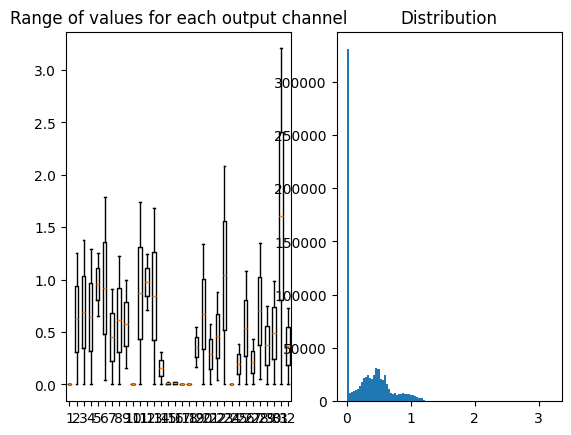

In [28]:
plot_output_channel(desired_output)

Disable the quantization to see the float output.

In [29]:
model_with_quantizer.apply(torch.quantization.disable_fake_quant)


QGraphModule(
  (fake_quant_0): QuantStub(
    (activation_post_process): FakeQuantize(
      fake_quant_enabled=tensor([0], device='cuda:0', dtype=torch.uint8), observer_enabled=tensor([0], device='cuda:0', dtype=torch.uint8), quant_min=0, quant_max=255, dtype=torch.quint8, qscheme=torch.per_tensor_affine, ch_axis=-1, scale=tensor([0.0078], device='cuda:0'), zero_point=tensor([127], device='cuda:0', dtype=torch.int32)
      (activation_post_process): MovingAverageMinMaxObserver(min_val=-1.0, max_val=1.0)
    )
  )
  (features_0_0): Conv2d(
    3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)
    (weight_fake_quant): FakeQuantize(
      fake_quant_enabled=tensor([0], device='cuda:0', dtype=torch.uint8), observer_enabled=tensor([0], device='cuda:0', dtype=torch.uint8), quant_min=-128, quant_max=127, dtype=torch.qint8, qscheme=torch.per_tensor_symmetric, ch_axis=-1, scale=tensor([0.0048], device='cuda:0'), zero_point=tensor([0], device='cuda:0', dtype=torch.int32)
      (activati

In [30]:
outputs = {}
def hook_fn(module, input, output):
    outputs["my_desired_layer_output"] = output
model_with_quantizer._modules['features_0_0'].register_forward_hook(hook_fn)
model_with_quantizer(images)

# The output of `fake_quant_0` is now stored in `outputs["my_desired_layer_output"]`
desired_output = outputs["my_desired_layer_output"]

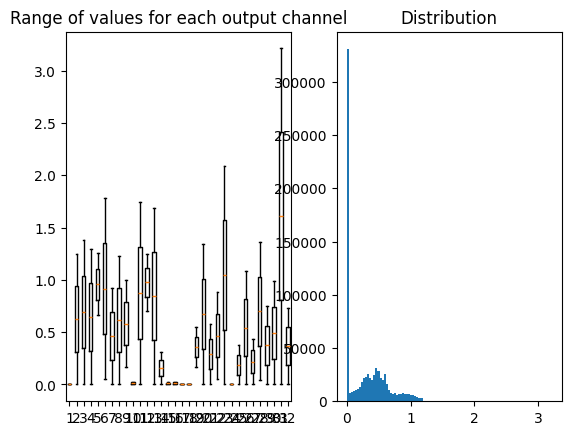

In [31]:
plot_output_channel(desired_output)

In [32]:
model_with_quantizer.apply(torch.quantization.enable_fake_quant)

QGraphModule(
  (fake_quant_0): QuantStub(
    (activation_post_process): FakeQuantize(
      fake_quant_enabled=tensor([1], device='cuda:0', dtype=torch.uint8), observer_enabled=tensor([0], device='cuda:0', dtype=torch.uint8), quant_min=0, quant_max=255, dtype=torch.quint8, qscheme=torch.per_tensor_affine, ch_axis=-1, scale=tensor([0.0078], device='cuda:0'), zero_point=tensor([127], device='cuda:0', dtype=torch.int32)
      (activation_post_process): MovingAverageMinMaxObserver(min_val=-1.0, max_val=1.0)
    )
  )
  (features_0_0): Conv2d(
    3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)
    (weight_fake_quant): FakeQuantize(
      fake_quant_enabled=tensor([1], device='cuda:0', dtype=torch.uint8), observer_enabled=tensor([0], device='cuda:0', dtype=torch.uint8), quant_min=-128, quant_max=127, dtype=torch.qint8, qscheme=torch.per_tensor_symmetric, ch_axis=-1, scale=tensor([0.0048], device='cuda:0'), zero_point=tensor([0], device='cuda:0', dtype=torch.int32)
      (activati

# TASK:

1.Select another network architecture, for instance, resnet, efficientnet. Perform quantization calibration of per-channel and per-tensor, and then compare their results, check the performance drop after PTQ.
(You can select just one, but feel free to test different networks and see how the quantization works)

2.Perform QAT training for the per-tensor quantization scheme, and see how much performance you can gain after QAT training.

3.Check the output of first conv layer, or any particular layer you want to see for the fake-quantized outputs and float outputs.

#### 1. Resnet Definition 

In [1]:
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion *
                               planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


In [2]:
import torch
import torch.utils
import torch.utils.data
from torchvision import transforms
import torchvision

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2)

valset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)
valloader = torch.utils.data.DataLoader(
    valset, batch_size=100, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')





Files already downloaded and verified
Files already downloaded and verified


In [3]:
from tqdm import tqdm
from torch import optim

device = "cuda" if torch.cuda.is_available() else "cpu"
model = ResNet(BasicBlock, [2, 2, 2, 2]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001,
                      momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)



num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    
    epoch_loss = 0.0
    
    progress_bar = tqdm(enumerate(trainloader), total=len(trainloader), desc=f"Epoch {epoch + 1}/{num_epochs} (Training)", leave=False)
    
    for i, (inputs, labels) in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())
        progress_bar.update(1)
    
    epoch_loss /= len(trainloader)
    print(f"Epoch {epoch + 1} Training Loss: {epoch_loss:.4f}")
    
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in valloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_loss /= len(valloader)
    accuracy = correct / total
    print(f"Epoch {epoch + 1} Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}")
    scheduler.step()



Epoch 1 Training Loss: 1.6210


Epoch 1 Validation Loss: 1.3305, Accuracy: 0.5155


Epoch 2 Training Loss: 1.2413


Epoch 2 Validation Loss: 1.1784, Accuracy: 0.5756


Epoch 3 Training Loss: 1.0249


Epoch 3 Validation Loss: 0.9488, Accuracy: 0.6671


Epoch 4 Training Loss: 0.8786


Epoch 4 Validation Loss: 0.8852, Accuracy: 0.6871


Epoch 5 Training Loss: 0.7689


Epoch 5 Validation Loss: 0.8231, Accuracy: 0.7129


Epoch 6 Training Loss: 0.6814


Epoch 6 Validation Loss: 0.7218, Accuracy: 0.7509


Epoch 7 Training Loss: 0.6164


Epoch 7 Validation Loss: 0.6511, Accuracy: 0.7752


Epoch 8 Training Loss: 0.5671


Epoch 8 Validation Loss: 0.6522, Accuracy: 0.7809


Epoch 9 Training Loss: 0.5251


Epoch 9 Validation Loss: 0.6081, Accuracy: 0.7989


Epoch 10 Training Loss: 0.4820


Epoch 10 Validation Loss: 0.6849, Accuracy: 0.7761


In [4]:
import gc

def calculate_validation_results(model, valloader):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in valloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            inputs, labels = inputs.to("cpu"), labels.to("cpu")
    
    val_loss /= len(valloader)
    accuracy = correct / total
    print(f"Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}")    

In [5]:
calculate_validation_results(model, valloader)

gc.collect()
torch.cuda.empty_cache()

Validation Loss: 0.6849, Accuracy: 0.7761


#### Per channel quantization

# TASK:

1.Select another network architecture, for instance, resnet, efficientnet. Perform quantization calibration of per-channel and per-tensor, and then compare their results, check the performance drop after PTQ.
(You can select just one, but feel free to test different networks and see how the quantization works)

2.Perform QAT training for the per-tensor quantization scheme, and see how much performance you can gain after QAT training.

3.Check the output of first conv layer, or any particular layer you want to see for the fake-quantized outputs and float outputs.

# Task 1
Select another network architecture, for instance, resnet, efficientnet. Perform quantization calibration of per-channel and per-tensor, and then compare their results, check the performance drop after PTQ.
(You can select just one, but feel free to test different networks and see how the quantization works)

In [6]:
from tinynn.graph.quantization.quantizer import QATQuantizer

def calibration(model, num_iteration, dataloader):
  for _ in tqdm(range(num_iteration), total=num_iteration):
    for data in dataloader:
        images, labels = data
        if torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()
        model(images)

  return model

#### Per Tensor quantization

In [7]:
quantizer = QATQuantizer(
        model,
        torch.randn(1,3,32,32),
        work_dir='quant_output',
        config={
            'asymmetric': True,
            'backend': 'qnnpack',
            "disable_requantization_for_cat": True,
            'per_tensor': True,
        })

model_with_quantizer = quantizer.quantize()
model_with_quantizer.eval()
model_with_quantizer = calibration(model_with_quantizer, 50, valloader)
calculate_validation_results(model_with_quantizer, valloader)

100%|██████████| 50/50 [03:50<00:00,  4.61s/it]


Validation Loss: 0.6827, Accuracy: 0.7779


#### Per channel quantization

In [8]:
quantizer = QATQuantizer(
        model,
        torch.randn(1,3,32,32),
        work_dir='quant_output',
        config={
            'asymmetric': True,
            'backend': 'qnnpack',
            "disable_requantization_for_cat": True,
            'per_tensor': False,
        })

model_with_quantizer = quantizer.quantize()
model_with_quantizer.eval()
model_with_quantizer = calibration(model_with_quantizer, 50, valloader)
calculate_validation_results(model_with_quantizer, valloader)

100%|██████████| 50/50 [03:54<00:00,  4.69s/it]


Validation Loss: 0.6797, Accuracy: 0.7783


#### Observations:
- Orginal: Validation Loss: 0.5466, Accuracy: 0.8171
- After per tensor quantization: Validation Loss: 0.5436, Accuracy: 0.8173
- After per channel quantization: Validation Loss: 0.5455, Accuracy: 0.8168

The differences in accuracy on validation dataset is miniscule for both per tensor and per channel quantization with minimally lower cross-validation loss function for both of them. Per tensor quantization leads to slightly higher accuracy and per channel quantization to lightly lower accuracy.

# Task 2
Perform QAT training for the per-tensor quantization scheme, and see how much performance you can gain after QAT training.

In [10]:
from tqdm import tqdm
from torch import optim

device = "cuda" if torch.cuda.is_available() else "cpu"
model = ResNet(BasicBlock, [2, 2, 2, 2]).to(device)

quantizer = QATQuantizer(
        model,
        torch.randn(1,3,32,32),
        work_dir='quant_output',
        config={
            'asymmetric': True,
            'backend': 'qnnpack',
            "disable_requantization_for_cat": True,
            'per_tensor': True,
        })

model_with_quantizer = quantizer.quantize()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001,
                      momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)



num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    
    epoch_loss = 0.0
    
    progress_bar = tqdm(enumerate(trainloader), total=len(trainloader), desc=f"Epoch {epoch + 1}/{num_epochs} (Training)", leave=False)
    
    for i, (inputs, labels) in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())
        progress_bar.update(1)
    
    epoch_loss /= len(trainloader)
    print(f"Epoch {epoch + 1} Training Loss: {epoch_loss:.4f}")
    
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in valloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_loss /= len(valloader)
    accuracy = correct / total
    print(f"Epoch {epoch + 1} Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}")
    scheduler.step()



Epoch 1 Training Loss: 1.6052


Epoch 1 Validation Loss: 1.3295, Accuracy: 0.5151


Epoch 2 Training Loss: 1.2028


Epoch 2 Validation Loss: 1.1446, Accuracy: 0.5916


Epoch 3 Training Loss: 0.9884


Epoch 3 Validation Loss: 0.9588, Accuracy: 0.6602


Epoch 4 Training Loss: 0.8478


Epoch 4 Validation Loss: 0.8377, Accuracy: 0.7051


Epoch 5 Training Loss: 0.7381


Epoch 5 Validation Loss: 0.7624, Accuracy: 0.7352


Epoch 6 Training Loss: 0.6677


Epoch 6 Validation Loss: 0.7457, Accuracy: 0.7507


Epoch 7 Training Loss: 0.6054


Epoch 7 Validation Loss: 0.6260, Accuracy: 0.7855


Epoch 8 Training Loss: 0.5601


Epoch 8 Validation Loss: 0.9000, Accuracy: 0.7202


Epoch 9 Training Loss: 0.5163


Epoch 9 Validation Loss: 0.5878, Accuracy: 0.8015


Epoch 10 Training Loss: 0.4842


Epoch 10 Validation Loss: 0.5864, Accuracy: 0.8006


##### When comparing to losses and accuracies without the QAT Training I couldnt observe any increase in performance, only a miniscule decrease. Maybe it's caused by a simple format of the data - images belong to 10 classes and have shape of 3,32,32

# Task 3
Check the output of first conv layer, or any particular layer you want to see for the fake-quantized outputs and float outputs

In [14]:
images, labels = next(iter(valloader))
model_with_quantizer._modules['fake_quant_0']
outputs = {}
def hook_fn(module, input, output):
    outputs["my_desired_layer_output"] = output
model_with_quantizer._modules['conv1'].register_forward_hook(hook_fn)
images = images.cuda()
model_with_quantizer(images)
desired_output = outputs["my_desired_layer_output"]

In [16]:
import matplotlib.pyplot as plt
def plot_output_channel(X):
  X=X.detach().cpu()
  C=desired_output.shape[1]
  # Create a figure and a set of subplots
  fig, (ax1, ax2) = plt.subplots(1, 2)  # 1 row, 2 columns
  ranges = torch.zeros((X.size(1), 2))  # Two columns for min and max
  for i in range(X.size(1)):  # Iterate over channels
      channel_data = X[:, i, :, :].flatten()  # Flatten the spatial dimensions
      ranges[i, 0] = torch.min(channel_data)  # Min value for this channel
      ranges[i, 1] = torch.max(channel_data)  # Max value for this channel

  # Convert the ranges to a format suitable for box plot
  ranges = ranges.numpy()

  # Create the box plot
  ax1.boxplot(ranges.transpose(), positions=range(1, C+1), showfliers=False)

  ax1.set_title('Range of values for each output channel')

  ax2.hist(X.flatten().detach().numpy(),bins=100)
  # Plot data on the second subplot
  ax2.set_title('Distribution')

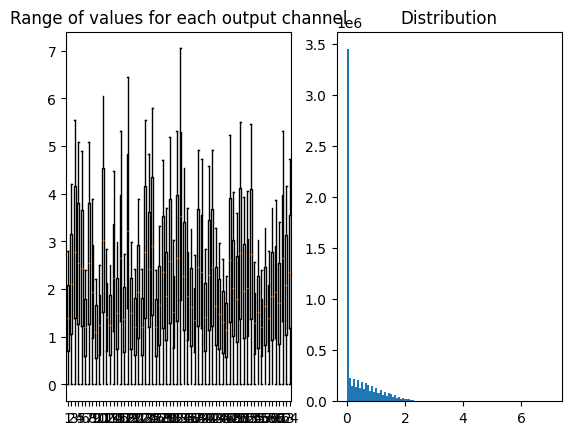

In [17]:
plot_output_channel(desired_output)

In [18]:
model_with_quantizer.apply(torch.quantization.disable_fake_quant)


QResNet(
  (fake_quant_0): QuantStub(
    (activation_post_process): FakeQuantize(
      fake_quant_enabled=tensor([0], device='cuda:0', dtype=torch.uint8), observer_enabled=tensor([1], device='cuda:0', dtype=torch.uint8), quant_min=0, quant_max=255, dtype=torch.quint8, qscheme=torch.per_tensor_affine, ch_axis=-1, scale=tensor([0.0203], device='cuda:0'), zero_point=tensor([120], device='cuda:0', dtype=torch.int32)
      (activation_post_process): MovingAverageMinMaxObserver(min_val=-2.429065704345703, max_val=2.7537312507629395)
    )
  )
  (conv1): ConvBnReLU2d(
    3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (weight_fake_quant): FakeQuantize(
      fake_quant_enabled=tensor([0], device='cuda:0', dtype=torch.uint8), observer_enabled=tensor([1], device='cuda:0', dtype=torch.uint8), quant_min=-128, quant_max=127, dtype=torch.qint8, qscheme=torch.per_tensor_symmetric, ch

In [20]:
outputs = {}
def hook_fn(module, input, output):
    outputs["my_desired_layer_output"] = output
model_with_quantizer._modules['conv1'].register_forward_hook(hook_fn)
model_with_quantizer(images)

# The output of `fake_quant_0` is now stored in `outputs["my_desired_layer_output"]`
desired_output = outputs["my_desired_layer_output"]

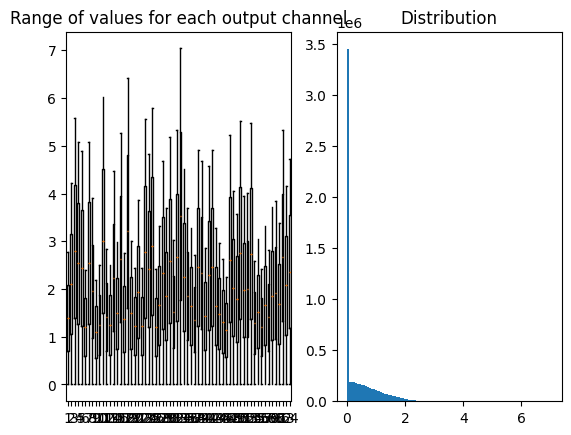

In [21]:
plot_output_channel(desired_output)